In [1]:
! pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip uninstall matpotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [5]:
main_data_dir = 'C:/Projects/Medicinal/Dataset/Medicinal Leaf dataset'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 20

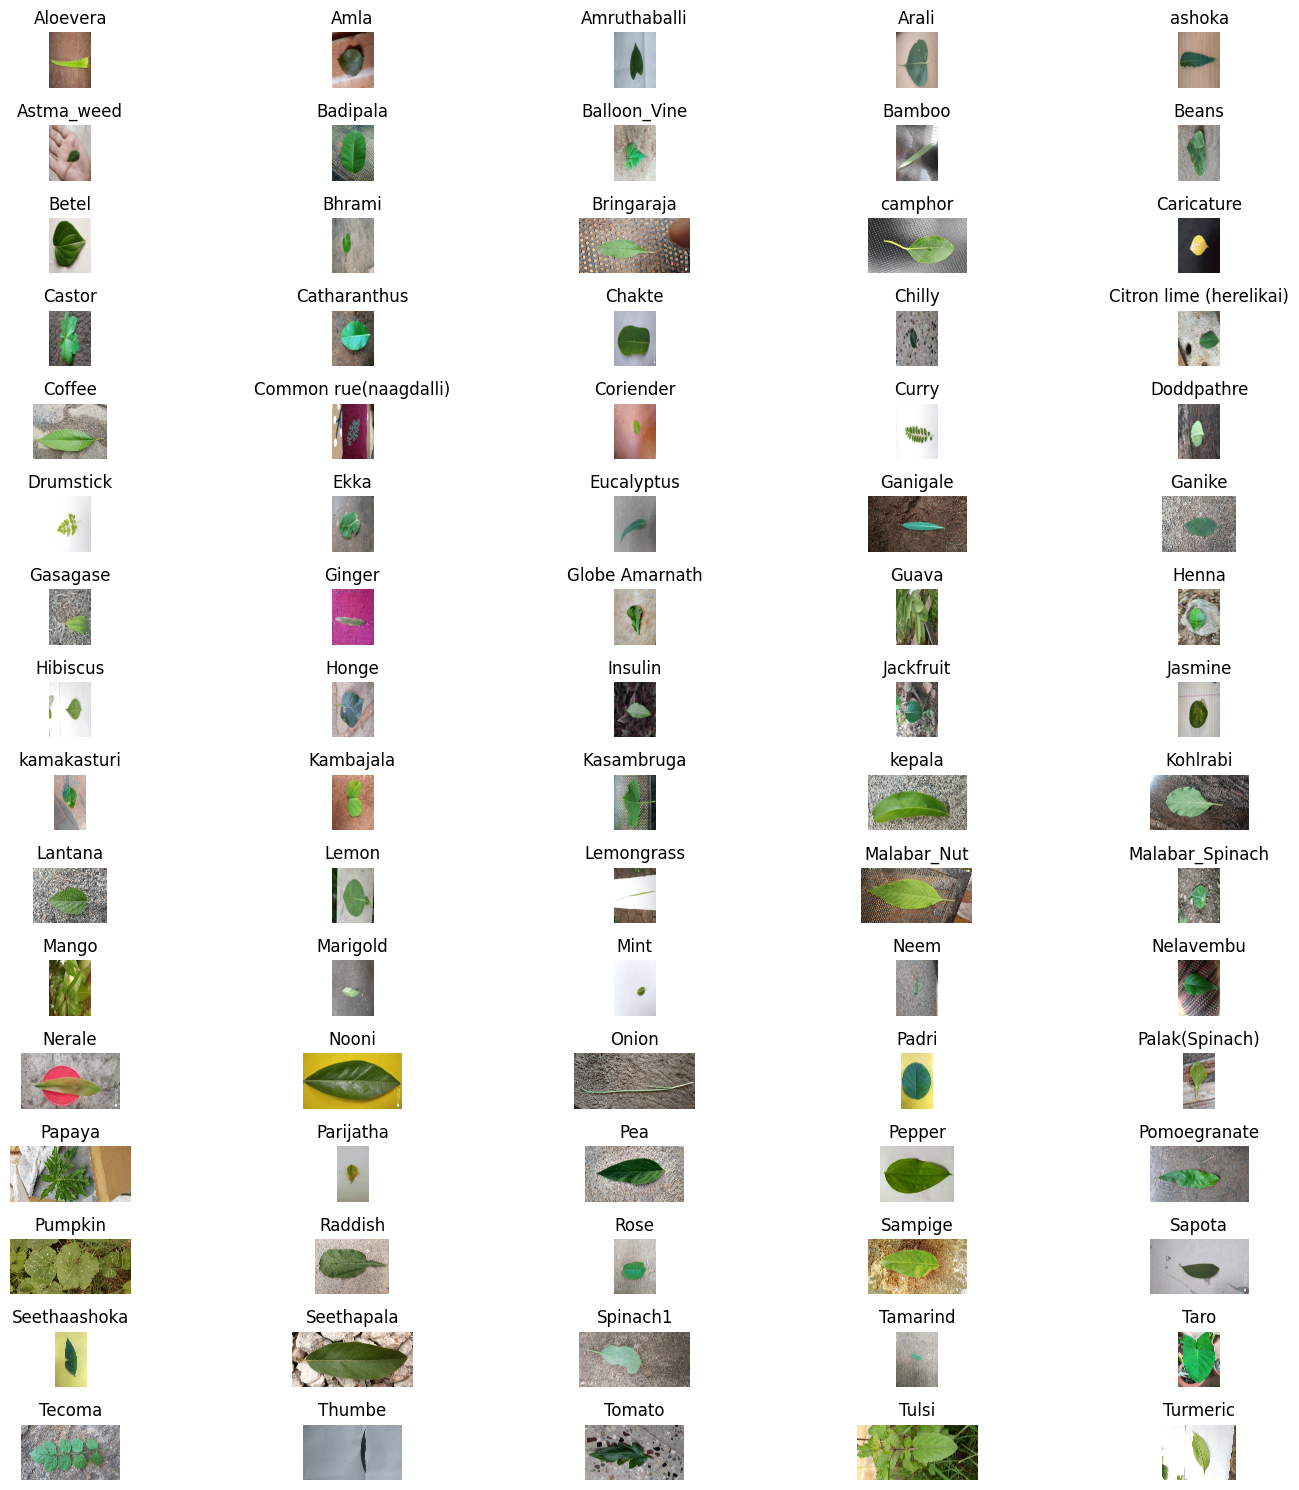

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# List all subdirectories (class folders) in the main directory
class_folders = os.listdir(main_data_dir)

# Set the number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = math.ceil(len(class_folders) / images_per_row)

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 15))

# Display images in rows with titles
for i, class_folder in enumerate(class_folders):
    # Get the first image file in the class folder
    class_folder_path = os.path.join(main_data_dir, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg')]
    if image_files:
        first_image_path = os.path.join(class_folder_path, image_files[0])
        
        # Load the image
        img = mpimg.imread(first_image_path)
        
        # Calculate the row and column indices for the subplot
        row = i // images_per_row
        col = i % images_per_row
        
        # Display the image in the corresponding subplot
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_folder)
        axs[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [8]:
# Split ratio between training and validation data
split_ratio = 0.8

# Create ImageDataGenerator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Set validation split
)

In [9]:
# Load and preprocess training data using the generator
train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

# Load and preprocess validation data using the generator
validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 5566 images belonging to 80 classes.
Found 1334 images belonging to 80 classes.


In [10]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


C:\Users\rachi\PycharmProjects\miniproject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 638s 4s/step - accuracy: 0.1200 - loss: 3.9735 - val_accuracy: 0.3361 - val_loss: 2.7103
Epoch 2/20
  1/173 ━━━━━━━━━━━━━━━━━━━━ 1:28 516ms/step - accuracy: 0.3125 - loss: 2.5084

C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3125 - loss: 2.5084 - val_accuracy: 0.2727 - val_loss: 3.2104
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.4178 - loss: 2.2461 - val_accuracy: 0.4337 - val_loss: 2.2745
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6250 - loss: 1.6466 - val_accuracy: 0.5455 - val_loss: 2.1788
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.5431 - loss: 1.6875 - val_accuracy: 0.4291 - val_loss: 2.1995
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4375 - loss: 1.7446 - val_accuracy: 0.5455 - val_loss: 1.9976
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 754s 4s/step - accuracy: 0.6051 - loss: 1.3962 - val_accuracy: 0.4962 - val_loss: 2.0402
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 1.2382 - val_accuracy: 0.3636 - val_loss: 2.6339
Epoch 9/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.6495 - loss: 1.2144 - val_accuracy: 0.4832 

In [13]:
model.save('plant_identification_model.keras')

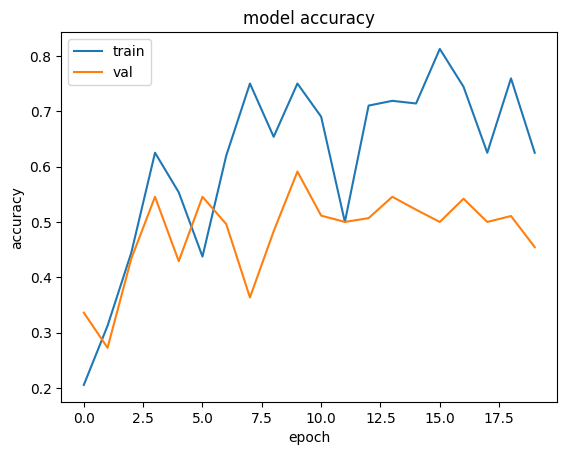

In [14]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()